# Alphabet

plot_imagesdel to generate Fonts!

In [1]:
import wandb
from utils import get_alphabet
from ddpm_conditional import *

In [2]:
run = wandb.init()
artifact = run.use_artifact('capecape/train_fonts/model:v10', type='model')
artifact_dir = artifact.download()

04:00:54 - ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: capecape. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact model:v10, 239.28MB. 3 files... Done. 0:0:0.0


In [5]:
model_cpkt_path = Path(artifact_dir)

In [3]:
config.epochs = 100
config.noise_steps = 1000
config.num_classes = 26
config.img_size = 32
config.batch_size = 320
config.slice_size = 1
config.log_every_epoch = 2

train_dl, _ = get_alphabet(config)

Load the diffusion class

In [4]:
adiff = Diffusion(config.noise_steps, img_size=config.img_size, num_classes=config.num_classes, c_in=1, c_out=1)

load the checkpoint

In [6]:
adiff.load(model_cpkt_path)

## Inference

Let's generate a bunch of As

In [25]:
labels = torch.zeros(80).long().cuda()

In [26]:
samples = adiff.sample(True, len(labels), labels)

04:09:35 - INFO: Sampling 80 new images....


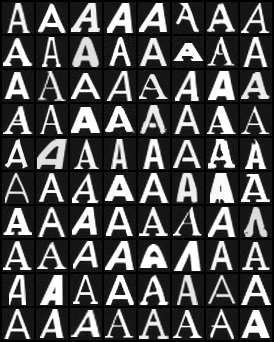

In [27]:
show(samples)

In [28]:
labels = torch.arange(10).long().cuda().repeat(10)

In [29]:
samples = adiff.sample(True, len(labels), labels)

04:11:28 - INFO: Sampling 100 new images....


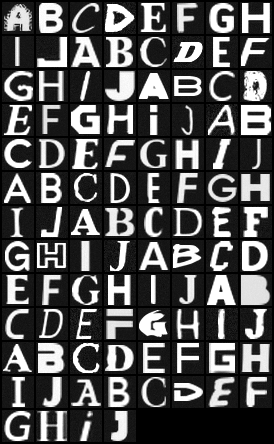

In [30]:
show(samples)

## Log intermediate Preds?